# Demand Curve and Inverse Demand Curve

Last week, we learned about the supply curve. This week, we will learn about the demand curve and using both the supply and demand curve to find market equilibrium. 

The demand curve shows the graphical relationship between the price of a good or service and the quantity demanded for it over a given period of time. In other words, it shows the quantity of goods or services consumers are willing to buy at each market price. The quantity of goods or services demanded or supplied is a function of price, as in   

$$\text{Quantity} = f(\text{Price})$$

The curve decreases because of the law of demand, which states that as the price of a good or service increases, the quantity demanded for it decreases, assuming all other factors are held constant. This makes intuitive sense: as prices increase, fewer people are willing to pay the higher price for the same good. Naturally, as prices decrease, more people are willing to pay the lower price for the same good. Hence, the demand of a good or service is based on the price. This relationship is usually somewhat linear and can be found as 

$$\text{Quantity}_{d}=a \cdot \text{Price}_{d} + b$$

This can be interpreted as: As the price unit increases by 1, there is an a unit increase/decrease in the quantity demanded. An example is 

$$\text{Quantity}_{d}=2 \cdot \text{Price}_{d} + 3$$

Another concept is when price is dependent on quantity. In this case, we use an inverse demand function, as it is an inverse function of the demand function. Thus, price is a function of quantity, as shown by 

$$\text{Price} = f(\text{Quantity})$$ 

Because it is the inverse of a demand function, the inverse demand function for the example above will be 

$$\text{Price}_{d}=\frac{1}{2}\cdot\text{Quantity}_{d}-3/2$$

## Shifts in Demand Curve

The demand curve can shift out or in based on events happening in the real world. Some factors other than a change in price of the good/service are changes in 

1. buyer's income

2. consumer preferences

3. expectation of future price/supply/demand/etc

4. price of related goods

If any of these changes occur and causes the demand for the selected good/service to decrease, then the curve shifts to the left, as less of the good or service will be demanded at every price. During the 2008 recession, consumers' incomes decreased. Because their buying power decreased, they purchased fewer items even though the prices of the select goods stayed the same. 

## Airfare Tickets and Market Equilibrium

In [1]:
# HIDDEN
from datascience import *

import sympy
solve = lambda x,y: sympy.solve(x-y)[0] if len(sympy.solve(x-y))==1 else "Not Single Solution"
import matplotlib.pyplot as plt
plt.style.use('seaborn-muted')
%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')
from ipywidgets import interact


We will now apply what we learned about demand functions and market equilibrium onto a real world dataset. We want to answer the question "What is the market equilibrium for airline tickets?" We will use a dataset released by the U.S. Department of Transportation on about 1,000 U.S. domestic routes for the 4th quarter of 2002. 

In [2]:
airlines = Table.read_table('airlines.csv')
airlines

City 1 | City 2  | Average Fare | Distance | Average Weekly Passengers | Market Leading Airline | Market Share | Average Fare.1 | Low Price Airline | Market Share.1 | Price
CAK    | ATL     | 114.47       | 528      | 424.56                    | FL                     | 70.19        | 111.03         | FL                | 70.19          | 111.03
CAK    | MCO     | 122.47       | 860      | 276.84                    | FL                     | 75.1         | 123.09         | DL                | 17.23          | 118.94
ALB    | ATL     | 214.42       | 852      | 215.76                    | DL                     | 78.89        | 223.98         | CO                | 2.77           | 167.12
ALB    | BWI     | 69.4         | 288      | 606.84                    | WN                     | 96.97        | 68.86          | WN                | 96.97          | 68.86
ALB    | ORD     | 158.13       | 723      | 313.04                    | UA                     | 39.79        | 161.36         | WN                | 15.34          | 145.42
ALB    | FLL     | 135.17       | 1204     | 199.02                    | WN                     | 40.68        | 137.97         | DL                | 17.09          | 127.69
ALB    | LAS     | 152.85       | 2237     | 237.17                    | WN                     | 59.94        | 148.59         | WN                | 59.94          | 148.59
ALB    | LAX     | 190.73       | 2467     | 191.95                    | DL                     | 17.89        | 205.06         | US                | 16.59          | 174
ALB    | MCO     | 129.35       | 1073     | 550.54                    | WN                     | 76.84        | 127.69         | WN                | 76.84          | 127.69
ALB    | TPA     | 134.17       | 1130     | 202.93                    | US                     | 35.4         | 132.91         | DL                | 26.4           | 124.78
... (990 rows omitted)

Remember that at the end of the day, we want columns relating to price and quantity. Create a new table that does just that. 

In [3]:
airlines = airlines.drop("Price")
airlinesFiltered = airlines.relabeled(["Average Fare", "Average Weekly Passengers"], ["Price", "Quantity"])

Revenue Per Available Seat Mile (RASM) measures the efficiency of different airlines. It is found by dividing the average fare by the distance. The higher the RASM, the more profitable the airline is. 

Create a scatter plot that displays the RASM of the dataset.

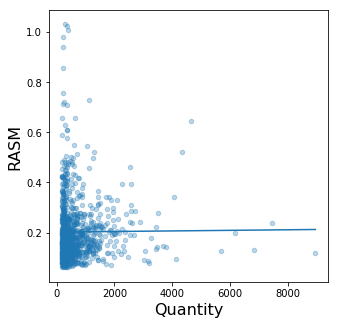

In [4]:
rasm = Table().with_columns("RASM", airlinesFiltered.column("Price") / airlines.column("Distance"), "Quantity", airlines.column(4))
rasm.scatter("Quantity", "RASM", fit_line = True, alpha = 0.3, color = "tab:blue")

That looks unconvincing. Let's segment the market based on distance into 3 categories. Make a scatter plot when you're done. 

1. short (distance is less than 700)

2. medium (distance is greater than or equal to 700 and less than 1900)

3. long (distance is greater than or equal to 1900)

In [5]:
airlinesFiltered

City 1 | City 2  | Price  | Distance | Quantity | Market Leading Airline | Market Share | Average Fare.1 | Low Price Airline | Market Share.1
CAK    | ATL     | 114.47 | 528      | 424.56   | FL                     | 70.19        | 111.03         | FL                | 70.19
CAK    | MCO     | 122.47 | 860      | 276.84   | FL                     | 75.1         | 123.09         | DL                | 17.23
ALB    | ATL     | 214.42 | 852      | 215.76   | DL                     | 78.89        | 223.98         | CO                | 2.77
ALB    | BWI     | 69.4   | 288      | 606.84   | WN                     | 96.97        | 68.86          | WN                | 96.97
ALB    | ORD     | 158.13 | 723      | 313.04   | UA                     | 39.79        | 161.36         | WN                | 15.34
ALB    | FLL     | 135.17 | 1204     | 199.02   | WN                     | 40.68        | 137.97         | DL                | 17.09
ALB    | LAS     | 152.85 | 2237     | 237.17   | WN                     | 59.94        | 148.59         | WN                | 59.94
ALB    | LAX     | 190.73 | 2467     | 191.95   | DL                     | 17.89        | 205.06         | US                | 16.59
ALB    | MCO     | 129.35 | 1073     | 550.54   | WN                     | 76.84        | 127.69         | WN                | 76.84
ALB    | TPA     | 134.17 | 1130     | 202.93   | US                     | 35.4         | 132.91         | DL                | 26.4
... (990 rows omitted)

In [6]:
short = airlinesFiltered.where(airlinesFiltered.column("Distance") < 700)
medium = airlinesFiltered.where(airlinesFiltered.column("Distance") >= 700 & (airlinesFiltered.column("Distance") < 1900))
long = airlinesFiltered.where(airlinesFiltered.column("Distance") >= 1900)

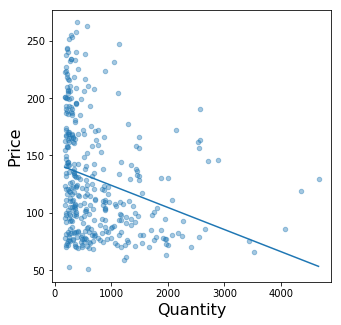

In [7]:
short.scatter("Quantity" , "Price", fit_line = True, alpha = 0.4, color = "tab:blue")

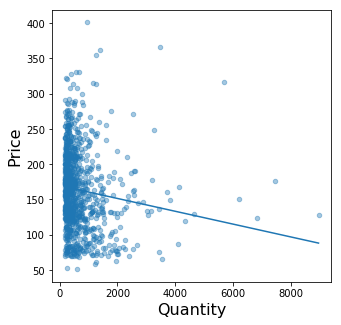

In [8]:
medium.scatter("Quantity" , "Price", fit_line = True, alpha = 0.4, color = "tab:blue")

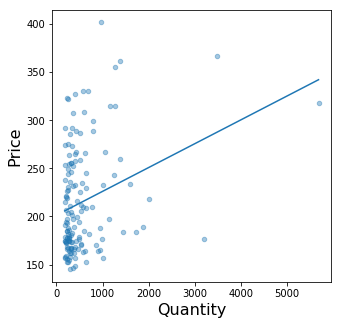

In [9]:
long.scatter("Quantity" , "Price", fit_line = True, alpha = 0.4, color = "tab:blue")

Most of the data seems to be scattered between 0 and 2000. Let's only look at that data for each of the market segments.

In [10]:
short = short.where(short.column("Quantity") < 2000)
medium = medium.where(medium.column("Quantity") < 2000)
long = long.where(long.column("Quantity") < 2000)

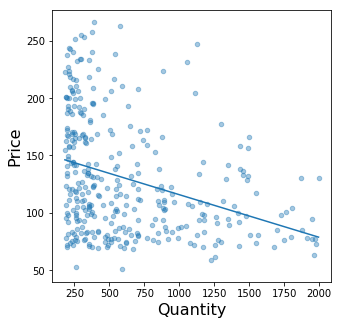

In [11]:
short.scatter("Quantity" , "Price", fit_line = True, alpha = 0.4, color = "tab:blue")

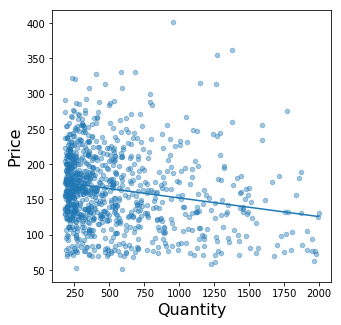

In [12]:
medium.scatter("Quantity" , "Price", fit_line = True, alpha = 0.4, color = "tab:blue")

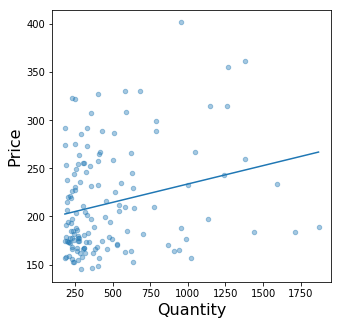

In [13]:
long.scatter("Quantity" , "Price", fit_line = True, alpha = 0.4, color = "tab:blue")

We can observe that "long" is different from "short" and "medium". This is due to a number of reasons (different supply curve, popularity of flights, etc). We will only focus on "short" and "medium" going forward.

Let's find the mean of the price of tickets sold per market segment.

In [14]:
np.mean(short.column("Price"))

129.70494152046786

In [15]:
np.mean(medium.column("Price"))

164.0686778593914

Let's also find the mean of the quantity of tickets sold per market segment.

In [16]:
np.mean(short.column("Quantity"))

622.004298245614

In [17]:
np.mean(medium.column("Quantity"))

544.6893913955929

Now you should see a linear relationship between price and quantity. Find and interpret an equation for each market segment. 

The general template is $y = mx + b$, where $m$ is the slope and $b$ is $y$-intercept. In economic terms, $m$ is the demand curve's slope that shows how the good's price affects the quantity demanded, and $b$ encompasses the effects of all of the factors that are not price that affect demand. 

We will use `np.polyfit` to find the slope and $y$-intercept. The first value in the array will be the slope, and the second value in the array will be the $y$-intercept.

In [18]:
shortCoefficients = np.polyfit(short.column("Quantity"),short.column("Price"),1)
shortCoefficients

array([-3.71445384e-02,  1.52809004e+02])

In [19]:
mediumCoefficients = np.polyfit(medium.column("Quantity"), medium.column("Price"),1)
mediumCoefficients

array([-2.64947489e-02,  1.78500087e+02])

In [20]:
Q = sympy.Symbol("Q")
shortdemand = -.037 * Q + 152.8
shortdemand

-0.037*Q + 152.8

In [21]:
mediumdemand = -.026 * Q + 178.5
mediumdemand

-0.026*Q + 178.5

Let's assume the supply curve for airfare is $y = 0.0225x + 100$ for each. This is not based on any data; it is chosen out for the purpose of this exercise. Use SymPy to create an expression for supply and interpret what this means.

In [22]:
supply = 0.0225 * Q + 100

Find the quantity equilibrium using the supply and demand curves for each market. Describe Q*. 

In [23]:
Q_star_short = solve(shortdemand, supply)
Q_star_short

887.394957983193

In [24]:
Q_star_medium = solve(mediumdemand, supply)
Q_star_medium

1618.55670103093

Why are the quantity equilibriums different from the mean of quantity of tickets sold different? Specifically, why is the quantity equilibrium so different from the average quantity for the medium market segment. 

Find the price equilibrium using the supply and demand curves for each market. Describe P*.

In [25]:
shortdemand.subs(Q, Q_star_short)
supply.subs(Q, Q_star_short)

119.966386554622

In [26]:
mediumdemand.subs(Q, Q_star_medium)
supply.subs(Q, Q_star_medium)

136.417525773196

Why are the price equilibriums different from the mean of quantity of tickets sold different? 

Visualize the market equilibrium on a graph. Describe the market equilibrium in this case.

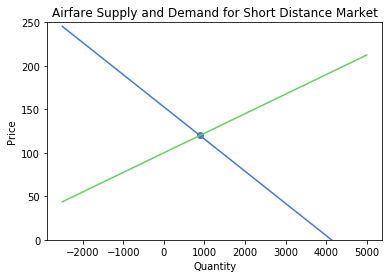

In [27]:
def plot_equation(equation, price_start, price_end, label=None):
    plot_prices = [price_start, price_end]
    plot_quantities = [equation.subs(list(equation.free_symbols)[0], c) for c in plot_prices]
    plt.plot(plot_prices, plot_quantities, label=label)
    
def plot_intercept(eq1, eq2):
    ex = sympy.solve(eq1-eq2)[0]
    why = eq1.subs(list(eq1.free_symbols)[0], ex)
    plt.scatter([ex], [why])
    return (ex, why)
    
plot_equation(shortdemand, -2500, 5000)
plot_equation(supply, -2500, 5000)
plt.ylim(0,250)
plt.title("Airfare Supply and Demand for Short Distance Market")
plt.xlabel("Quantity")
plt.ylabel("Price")
plot_intercept(supply, shortdemand)
plt.show()

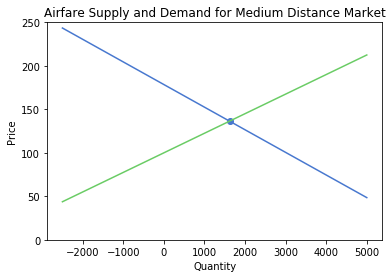

In [28]:
plot_equation(mediumdemand, -2500, 5000)
plot_equation(supply, -2500, 5000)
plt.ylim(0,250)
plt.title("Airfare Supply and Demand for Medium Distance Market")
plt.xlabel("Quantity")
plt.ylabel("Price")
plot_intercept(supply, mediumdemand)
plt.show()

How do the two market segments compare against each other?

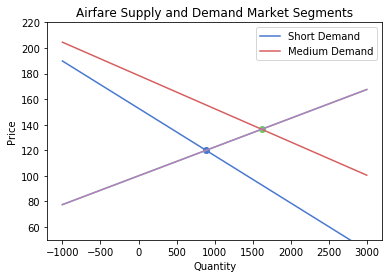

In [29]:
plot_equation(shortdemand, -1000, 3000, label = "Short Demand")
plot_equation(supply, -1000, 3000)
plt.ylim(50,220)
plt.title("Airfare Supply and Demand Market Segments")
plt.xlabel("Quantity")
plt.ylabel("Price")
plot_intercept(supply, shortdemand)

plot_equation(mediumdemand, -1000, 3000, label = "Medium Demand")
plot_equation(supply, -1000, 3000)
plot_intercept(supply, mediumdemand)

plt.legend(loc = "upper right")
plt.show()

Assume the economy boosted 4% last quarter and all consumers in the short distance airfare industry now have $40 more to spend on airfare. How will this impact the demand curve? Describe how this will change market equilibrium both algebraically and graphically.

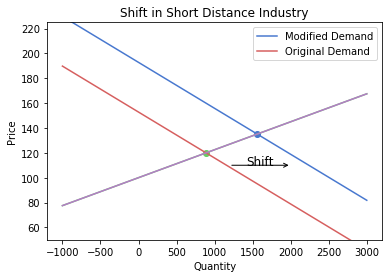

In [30]:
newDemand = shortdemand + 40
Q_star = solve(newDemand, supply)
newDemand.subs(Q, Q_star)
supply.subs(Q, Q_star)

plot_equation(newDemand, -1000, 3000, label = "Modified Demand")
plot_equation(supply, -1000, 3000)
plt.ylim(50,225)
plt.title("Shift in Short Distance Industry")
plt.xlabel("Quantity")
plt.ylabel("Price")
plot_intercept(supply, newDemand)

plot_equation(shortdemand, -1000, 3000, label = "Original Demand")
plot_equation(supply, -1000, 3000)
plot_intercept(supply, shortdemand)

plt.legend(loc = "upper right")

xstmark=1200
xenmark=2000
ystmark=110
an1=plt.annotate(s='',xy=(xstmark, ystmark), xycoords='data', xytext=(xenmark, ystmark),textcoords='data', arrowprops=dict(arrowstyle="<-"))
plt.annotate(s='Shift',xy=(((xstmark+xenmark)/2), ystmark), xycoords='data',fontsize=12.0,textcoords='data',ha='center')

plt.show()

# Delta's Innovations 

In 2002, Delta sponsored the 2002 Olympic Winter Games at its Salt Lake City hub. Different technological innovations, such as kiosks at check-in, expanded gate information systems and virtual check-in on websites improved customer experience. Because of these two factors, consumers believed Delta was a promising airline to fly on. Manipulate the original table to only assume Delta flights for Market Leading Airline and see if its demand curve is different from the general demand curve. Why do you think there is a difference or is not a difference?

In [31]:
airlines

City 1 | City 2  | Average Fare | Distance | Average Weekly Passengers | Market Leading Airline | Market Share | Average Fare.1 | Low Price Airline | Market Share.1
CAK    | ATL     | 114.47       | 528      | 424.56                    | FL                     | 70.19        | 111.03         | FL                | 70.19
CAK    | MCO     | 122.47       | 860      | 276.84                    | FL                     | 75.1         | 123.09         | DL                | 17.23
ALB    | ATL     | 214.42       | 852      | 215.76                    | DL                     | 78.89        | 223.98         | CO                | 2.77
ALB    | BWI     | 69.4         | 288      | 606.84                    | WN                     | 96.97        | 68.86          | WN                | 96.97
ALB    | ORD     | 158.13       | 723      | 313.04                    | UA                     | 39.79        | 161.36         | WN                | 15.34
ALB    | FLL     | 135.17       | 1204     | 199.02                    | WN                     | 40.68        | 137.97         | DL                | 17.09
ALB    | LAS     | 152.85       | 2237     | 237.17                    | WN                     | 59.94        | 148.59         | WN                | 59.94
ALB    | LAX     | 190.73       | 2467     | 191.95                    | DL                     | 17.89        | 205.06         | US                | 16.59
ALB    | MCO     | 129.35       | 1073     | 550.54                    | WN                     | 76.84        | 127.69         | WN                | 76.84
ALB    | TPA     | 134.17       | 1130     | 202.93                    | US                     | 35.4         | 132.91         | DL                | 26.4
... (990 rows omitted)

The following cell of code is provided.

In [32]:
delta = airlines.where("Market Leading Airline", "DL")
delta = delta.select(["Average Fare", "Average Weekly Passengers"])
delta = delta.relabeled(["Average Weekly Passengers", "Average Fare"], ["Quantity", "Price"])
delta = delta.where(delta.column("Quantity") < 2000)

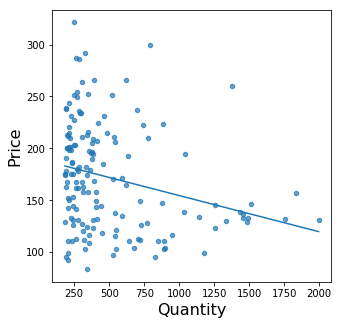

In [33]:
delta.scatter("Quantity", "Price", fit_line = True, color = "tab:blue")

In [34]:
np.polyfit(delta.column("Quantity"),delta.column("Price"),1)

array([-3.49594506e-02,  1.89076806e+02])

In [35]:
deltademand = -0.035 * Q + 189.1

Suppose the supply curve is $\text{Supply} = 0.03 \cdot Q + 14$. This is not based on any data; it is chosen out for the purpose of this exercise. Write its expression. 

In [36]:
deltasupply = 0.03 * Q + 14

Find the quantity equilibrium.

In [37]:
Q_star_delta = solve(deltademand, deltasupply)
Q_star_delta

2693.84615384615

Find the price equilibrium.

In [38]:
deltademand.subs(Q, Q_star_delta)

94.8153846153846

In [39]:
deltasupply.subs(Q, Q_star_delta)

94.8153846153846

Find the market equilibrium. Visualize it.

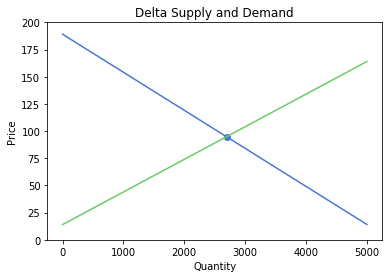

In [40]:
plot_equation(deltademand, 0, 5000)
plot_equation(deltasupply, 0, 5000)
plt.ylim(0,200)
plt.title("Delta Supply and Demand")
plt.xlabel("Quantity")
plt.ylabel("Price")
plot_intercept(deltasupply, deltademand)
plt.show()

In this week's homework, one of the exercises you will work on is to compare Delta vs non-Delta flights' demand. Until then, let's suppose that Delta's innovations did influence the demand of Delta tickets. How would the demand curve shift? 


Original Intercept: (2693.84615384615, 94.8153846153846)
New intercept: (1445.21739130435, 132.517391304348)
Change in Price: 37.7


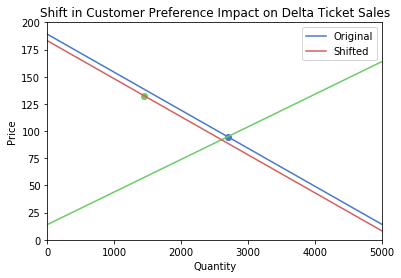

In [41]:
# NO CODE
def shift_demand():
    equation = deltademand
    def shift_helper(shift):
        plot_equation(equation, 0, 10000, "Original")
        plot_equation(deltasupply, 0, 10000)
        old = plot_intercept(equation, deltasupply)
        print('Original Intercept:', old)
        
        if shift != 0:
            plot_equation(equation + shift, -10, 10000, 'Shifted')
            new = plot_intercept(equation + shift, supply)
            print('New intercept:', new)
            print('Change in Price:', round(float(new[1]-old[1]), 2))
        else:
            print('Nothing shifted yet, use the slider to move the line!')
        plt.xlim(0,5000)
        plt.ylim(0,200)
        plt.legend()
        plt.ylabel("Price")
        plt.xlabel("Quantity")
        plt.title("Shift in Customer Preference Impact on Delta Ticket Sales")
    interact(shift_helper, shift=(-50, 40, 2))

shift_demand()